In [146]:
# Importing all the relevant libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [147]:
# load the dataset
fifa19_player_df = pd.read_csv(r'C:\Users\JAINMR1\Desktop\data.csv')
fifa19_player_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [148]:
# Identifying the rows and columns
fifa19_player_df.shape[0]

18207

In [149]:
# Datatype of each column
fifa19_player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [150]:
# What kind information is provied?
fifa19_player_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [151]:
# missing values
fifa19_player_df.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

In [152]:
# Drop unused columns
columns_to_drop = ['Unnamed: 0', 'ID', 'Photo', 'Flag','Club Logo', 'Preferred Foot', 
                   'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From',
                   'Contract Valid Until', 'Height', 'Weight','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
                   'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
                   'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause']

fifa19_player_df.drop(columns_to_drop, axis=1, inplace=True)

In [153]:
# Converting dollar amounts in M and K (string) into numbers
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])

In [154]:
# Convert value, wage to number
# First convert value, wage string to actual amount, then divide by 1 million and 1 k respectively
fifa19_player_df['Value_M'] = fifa19_player_df['Value'].apply(lambda x: str2number(x) / 1000000)
fifa19_player_df['Wage_K'] = fifa19_player_df['Wage'].apply(lambda x: str2number(x) / 1000)

# Drop original value & wage column
fifa19_player_df.drop(['Value', 'Wage'], axis=1, inplace=True)

In [155]:
# From below we can see that highest player value is 118.8m and wage is 565k
# Which are Neymar Jr and L. Messi respectively.
fifa19_player_df.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,...,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,2.410696,9.731312
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,...,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,5.594933,21.999290
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,...,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,...,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.300000,1.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,54.000000,49.000000,56.000000,...,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,0.675000,3.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,64.000000,62.000000,64.000000,...,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,2.000000,9.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,93.000000,95.000000,94.000000,...,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,118.500000,565.000000


In [156]:
# Missing value handling
missing_player_df = fifa19_player_df[fifa19_player_df['Agility'].isnull()]

In [157]:
missing_player_df.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K
count,48.000000,48.0,48.000000,48.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.000000,48.000000
mean,25.000000,62.0,66.833333,1562.229167,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.354375,1.687500
std,4.472136,0.0,5.272705,127.956981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.117354,0.992659
min,17.000000,62.0,62.000000,1141.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,1.000000
25%,22.000000,62.0,62.000000,1506.750000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,1.000000
50%,25.000000,62.0,65.500000,1576.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337500,1.000000
75%,27.000000,62.0,70.000000,1664.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.425000,2.000000
max,37.000000,62.0,82.000000,1740.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650000,5.000000


In [158]:
club_wages = fifa19_player_df.groupby('Club').sum()

In [159]:
club_player_count = fifa19_player_df.groupby('Club').count().sort_values('Age', ascending=False)
c = club_player_count.merge(club_wages, how = "inner", on = "Club")
c["cost_per_player"] = c["Wage_K_y"]/c["Age_x"]
c = c.sort_values("cost_per_player", ascending = False)
c.head(10)


,Name,Age_x,Nationality,Overall_x,Potential_x,Special_x,International Reputation_x,Weak Foot_x,Skill Moves_x,Work Rate,...,StandingTackle_y,SlidingTackle_y,GKDiving_y,GKHandling_y,GKKicking_y,GKPositioning_y,GKReflexes_y,Value_M_y,Wage_K_y,cost_per_player
Club,,,,,,,,,,,,,,,,,,,,,
Real Madrid,33,33,33,33,33,33,33,33,33,33,...,1850.0,1753.0,627.0,627.0,583.0,579.0,615.0,874.425,5017.0,152.030303
FC Barcelona,33,33,33,33,33,33,33,33,33,33,...,1886.0,1775.0,599.0,601.0,623.0,615.0,617.0,852.600,4837.0,146.575758
Juventus,25,25,25,25,25,25,25,25,25,25,...,1553.0,1497.0,419.0,402.0,386.0,438.0,450.0,704.475,3292.0,131.680000
Manchester City,33,33,33,33,33,33,33,33,33,33,...,1839.0,1699.0,592.0,570.0,578.0,577.0,560.0,786.555,3741.0,113.363636
Manchester United,33,33,33,33,33,33,33,33,33,33,...,1914.0,1812.0,547.0,545.0,563.0,537.0,565.0,588.850,3391.0,102.757576
Chelsea,33,33,33,33,33,33,33,33,33,33,...,1837.0,1762.0,577.0,571.0,538.0,560.0,590.0,606.815,3249.0,98.454545
Liverpool,33,33,33,33,33,33,33,33,33,33,...,1845.0,1748.0,521.0,558.0,519.0,484.0,528.0,585.055,2902.0,87.939394
Tottenham Hotspur,33,33,33,33,33,33,33,33,33,33,...,1844.0,1735.0,588.0,579.0,563.0,607.0,615.0,618.450,2623.0,79.484848
FC Bayern München,29,29,29,29,29,29,29,29,29,29,...,1517.0,1483.0,538.0,507.0,557.0,533.0,563.0,679.025,2286.0,78.827586


In [160]:
# Number of clubs and average number of players in each club
print('Number of clubs is {}'.format(club_player_count.shape[0]))
print('Average number players in each club is {}'.format(round(club_player_count['Age'].mean(),2)))
club_player_count.head(10)

Number of clubs is 651
Average number players in each club is 27.6


,Name,Age,Nationality,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K
Club,,,,,,,,,,,,,,,,,,,,,
Borussia Dortmund,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
Tottenham Hotspur,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
Chelsea,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
Valencia CF,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
Everton,33,33,33,33,33,33,32,32,32,32,...,32,32,32,32,32,32,32,32,33,33
Newcastle United,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
Real Madrid,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
Frosinone,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
Arsenal,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33


In [161]:
# Calculate average overall rating
age_mean = fifa19_player_df.groupby('Age').mean()

In [162]:
# Plot age distribution and overall rating together
age_count_list = age_count.values.tolist()
age_overall_rating_list = age_mean['Overall'].values.tolist()

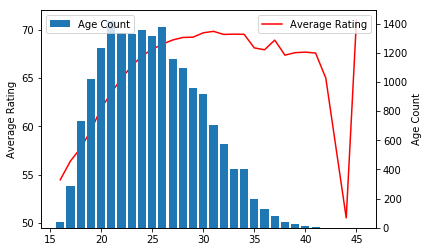

In [163]:

ages = age_count.index.values.tolist()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ages,age_overall_rating_list, color = 'red', label='Average Rating')
ax1.legend(loc=1)
ax1.set_ylabel('Average Rating')

ax2 = ax1.twinx()
plt.bar(ages, age_count_list, label='Age Count')
ax2.legend(loc=2)
ax2.set_ylabel('Age Count')
plt.show()

In [165]:
# Drop the 48 players whose skill set is missing.
fifa19_player_df.dropna(axis=0, how='any', inplace=True)

In [166]:
# Work Rate is in the format of attack work rate/defence work rate
# so need to create two new columns here.
fifa19_player_df['Work Rate Attack'] = fifa19_player_df['Work Rate'].map(lambda x: x.split('/')[0])
fifa19_player_df['Work Rate Defence'] = fifa19_player_df['Work Rate'].map(lambda x: x.split('/')[1])
fifa19_player_df.drop('Work Rate', axis=1, inplace=True)

In [167]:
fifa19_player_df.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Position,Crossing,Finishing,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K,Work Rate Attack,Work Rate Defence
0,31,94,94,2202,5.0,4.0,4.0,RF,84.0,95.0,...,26.0,6.0,11.0,15.0,14.0,8.0,110.5,565.0,Medium,Medium
1,33,94,94,2228,5.0,4.0,5.0,ST,84.0,94.0,...,23.0,7.0,11.0,15.0,14.0,11.0,77.0,405.0,High,Low
2,26,92,93,2143,5.0,5.0,5.0,LW,79.0,87.0,...,33.0,9.0,9.0,15.0,15.0,11.0,118.5,290.0,High,Medium
3,27,91,93,1471,4.0,3.0,1.0,GK,17.0,13.0,...,13.0,90.0,85.0,87.0,88.0,94.0,72.0,260.0,Medium,Medium
4,27,91,92,2281,4.0,5.0,4.0,RCM,93.0,82.0,...,51.0,15.0,13.0,5.0,10.0,13.0,102.0,355.0,High,High


In [168]:
# One Hot Encoding for Position, Work Rate Attack, Work Rate Defence
one_hot_columns = ['Position', 'Work Rate Attack', 'Work Rate Defence']
fifa19_player_df = pd.get_dummies(fifa19_player_df, columns=one_hot_columns, prefix = one_hot_columns)

In [169]:
fifa19_player_df.shape

(18147, 76)

In [170]:
#DEfining the X and Y variables
y = fifa19_player_df['Potential']
X = fifa19_player_df.drop(['Value_M', 'Wage_K', 'Potential', 'Overall'], axis=1)

In [171]:
# Spliting the datasets into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [172]:
# Running Random Forest for regression and calucating key metrics for evaluation
ForestRegressor = RandomForestRegressor(n_estimators=500)
ForestRegressor.fit(X_train, y_train)
y_test_preds = ForestRegressor.predict(X_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))

0.8713528505274959
4.91623424426079


In [173]:
#Idenitfying the variable importance
coefs_df = pd.DataFrame()

coefs_df['Features'] = X_train.columns
coefs_df['Coefs'] = ForestRegressor.feature_importances_
coefs_df.sort_values('Coefs', ascending=False).head(10)

,Features,Coefs
14,BallControl,0.262215
18,Reactions,0.202715
0,Age,0.180647
32,StandingTackle,0.066750
38,GKReflexes,0.026249
34,GKDiving,0.022222
1,Special,0.018889
7,HeadingAccuracy,0.017059
26,Interceptions,0.015732
31,Marking,0.014848


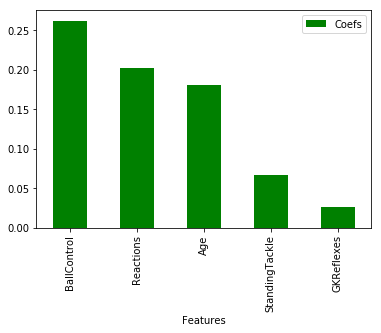

In [174]:
# Ploting the variable of importance
coefs_df.set_index('Features', inplace=True)
coefs_df.sort_values('Coefs', ascending=False).head(5).plot(kind='bar', color='green')